# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Maineville, Ohio, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Maineville, Ohio, United States** to Ann Arbor, USA. In that case at least one source file must be about **Maineville, Ohio, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Maineville, Ohio, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

United States and religious events or traditions


Find a trend between places of worship and state social data

https://data.world/awram/us-places-of-worship
https://data.world/kevinnayar/us-states-sociological-metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib notebook
sns.set(style='white')

In [2]:
#load worship locations data
locations = pd.read_csv('https://query.data.world/s/gir3fm5mfhedhe7c2x5x6eevgn43my')
#locations = pd.read_csv('All_Places_of_Worship.csv')

In [3]:
#load US social data by state
#social_data = pd.read_csv('data.csv')
social_data = pd.read_csv('https://query.data.world/s/hpfsu7wfrkyke43aeava642ltskcde')

In [4]:
#state abbreviations dictionary
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [5]:
#create state abbreviation column
social_data['state_a'] = social_data['State'].map(us_state_abbrev)

In [6]:
#subset worship locations data to include only 50 states
locations = locations[locations['STATE'].isin(social_data['state_a'])]

In [7]:
#calculate percent of non-chrisian worship places per state
x = locations[locations['SUBTYPE']!='CHRISTIAN']['STATE'].value_counts()
y = locations['STATE'].value_counts()

perc = (x/y)*100
chris = perc.to_frame()
chris.head()

,STATE
AK,13.815789
AL,2.922886
AR,4.248366
AZ,12.761506
CA,26.387703


In [8]:
social_data.set_index('state_a', inplace=True)

In [9]:
chris.columns = ['Percent Non-Christian']

In [10]:
#combine social data with calculated percent of non-christian worship places
df = social_data.join(chris)

In [11]:
#explore the correlation coefficients
df.corr()


,Percent Educational Attainment,Percent Peace Index,Percent Above Poverty Rate,Percent Non-religious,Percent Non-Christian
Percent Educational Attainment,1.000000,0.357965,0.678382,0.637569,0.687877
Percent Peace Index,0.357965,1.000000,0.605937,0.612512,0.273693
Percent Above Poverty Rate,0.678382,0.605937,1.000000,0.670659,0.409734
Percent Non-religious,0.637569,0.612512,0.670659,1.000000,0.658942
Percent Non-Christian,0.687877,0.273693,0.409734,0.658942,1.000000


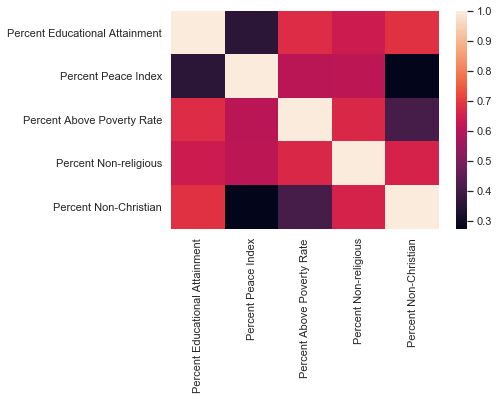

In [12]:
#explore correlation visualy 
sns.heatmap(df.corr())
plt.show()

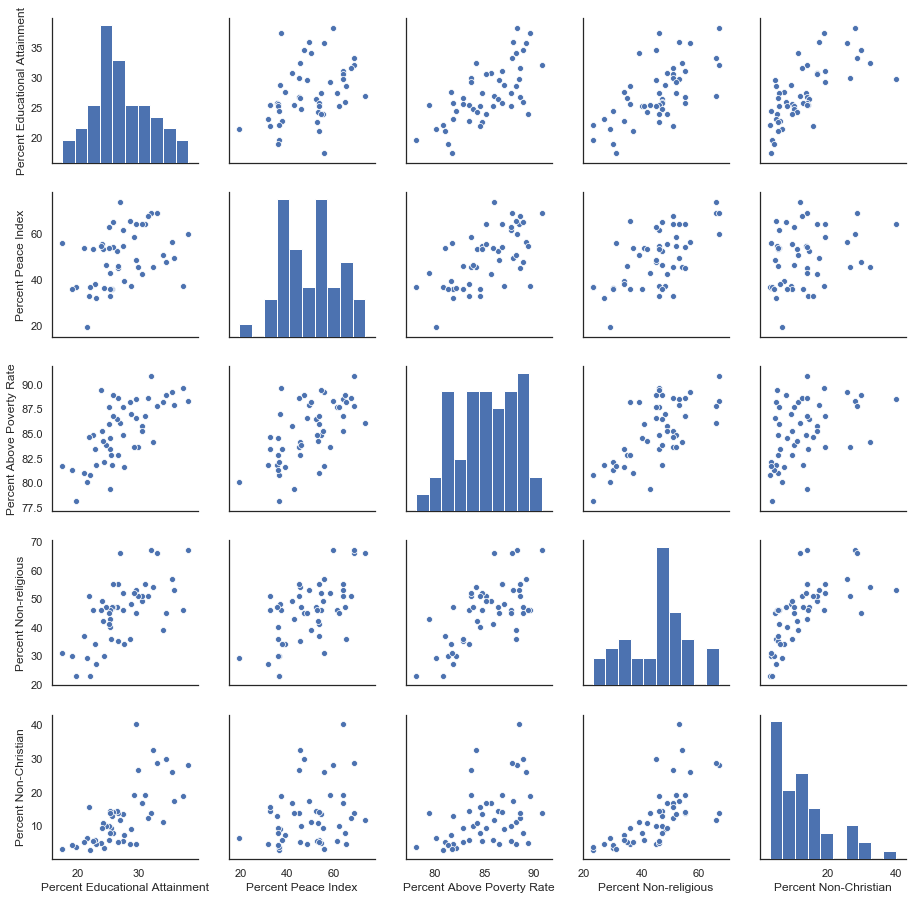

In [13]:
#explore the correlations visually
sns.pairplot(df)
plt.show()

In [14]:
#reset index for plotting
df.reset_index(inplace=True)

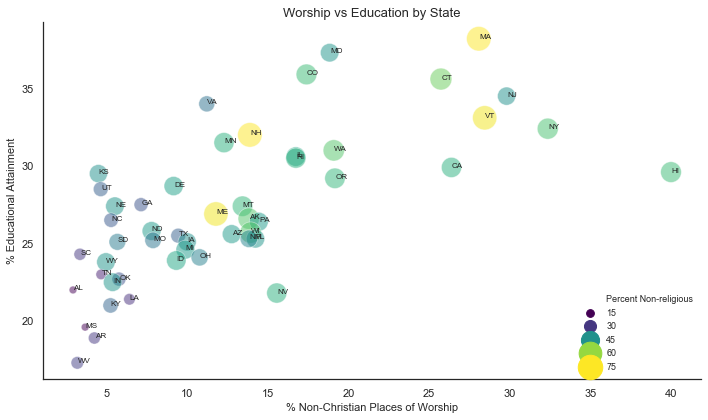

In [15]:
#set up the plot

ax = sns.relplot(data=df, x ='Percent Non-Christian', y =  "Percent Educational Attainment",
                 size='Percent Non-religious', palette='viridis',
                 hue='Percent Non-religious',sizes=(60,600), alpha=0.5, height=8)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']),fontdict={'fontsize': 8})

label_point(df['Percent Non-Christian'], df['Percent Educational Attainment'], df['state_a'], plt.gca()) 
ax.fig.set_size_inches(10,6)
plt.xlabel('% Non-Christian Places of Worship', fontdict={'fontsize': 11})
plt.ylabel('% Educational Attainment',fontdict={'fontsize': 11})
plt.title("Worship vs Education by State", fontdict={'fontsize':13})
plt.legend(loc='lower right', frameon=False, fontsize=9)
ax._legend.remove()

plt.tight_layout()
plt.show()

I have explored two data sets, one on places of worship in USA and the other containing social data for all 50 states. My objective was to perform some exploratory analysis to find any traits or correlations. I have calculated percentage of Non-Christian worship places per state using the first data set indicating weather the state is diverse religiously or not. Then I merged the datasets and explored further by looking at the correlation table. It turned out that the percentage of Non-Christian places of worship in the state correlates  most with the state's educational attainment, therefore I decided to create a visualisation to demonstrate it. I added another variable to the plot indicating percentage of non religious population per state which was the second most correlated item. It's important to understand that correlation does not mean causation, in fact there might be another factor that influences religious diversity and edication in each state, but it's still worth to give it a try and explore.